# Lethal Company v50 - Profitability Report

In [107]:
import random
import numpy as np
import pandas as pd

In [108]:
df = pd.read_csv('moons.csv')
df['Mean Loot'] = (df['Min Scrap'].astype(int) + df['Max Scrap'].astype(int)) / 2

In [109]:
import math


# Number of attempts
def select_random_items(data, random_items_n):
    spawn_chances = data['Spawn Chance'].str.replace('%', '').astype(float) / 100
    items = data['Item'].values
    random_items_n = math.floor(random_items_n)
    selected_items = random.choices(items, weights=spawn_chances, k=random_items_n)
    return selected_items

# Function to calculate the total based on average price of selected items
def calculate_total(data, selected_items):
    avg_prices = data.set_index('Item')['Average Value (c)'].astype(str).str.replace(' ▮', '').astype(float)
    total = sum(avg_prices.loc[item] for item in selected_items)
    return total

# Function to run the simulation 100 times and calculate the average total
def run_simulation(data, random_items_n, num_runs=100):
    totals = []
    for _ in range(num_runs):
        selected_items = select_random_items(data, random_items_n)
        total = calculate_total(data, selected_items)
        totals.append(total)
    avg_total = sum(totals) / num_runs
    return avg_total

In [110]:
results = []

for _, moon in df.iterrows():
    moon_name = moon['Name'] + '.csv'
    moon_mean_items = moon['Mean Loot']
    item_data = pd.read_csv(moon_name)
    avg_total = run_simulation(item_data, moon_mean_items)
    avg_total_max_12 = run_simulation(item_data, min(moon_mean_items, 12))
    avg_total_max_16 = run_simulation(item_data, min(moon_mean_items, 16))
    avg_total_max_20 = run_simulation(item_data, min(moon_mean_items, 20))
    result = pd.DataFrame({
        'Moon': [moon['Name']],
        'Average Total (cents)': [avg_total],
        'Average Total with 12 items looted (cents)': [avg_total_max_12],
        'Average Total with 16 items looted (cents)': [avg_total_max_16],
        'Average Total with 20 items looted (cents)': [avg_total_max_20]
    })
    results.append(result)

combined_results = pd.concat(results, ignore_index=True)

In [111]:
moons = df.join(combined_results.set_index('Moon'), on='Name')
moons['Average Total minus Cost'] = moons['Average Total (cents)'] - moons['Cost'].astype(float)
moons

,Name,Difficulty,Cost,Default Layout,Map Size Multiplier,Min Scrap,Max Scrap,Max Indoor Power,Max Outdoor Power,Mean Loot,Average Total (cents),Average Total with 12 items looted (cents),Average Total with 16 items looted (cents),Average Total with 20 items looted (cents),Average Total minus Cost
0,41-Experimentation,Easy,0,The Factory,1.00,8,11,4,8,9.5,280.73,280.99,275.55,276.43,280.73
1,220-Assurance,Easy,0,The Factory,1.00,13,15,6,8,14.0,531.76,457.05,532.48,531.37,531.76
2,56-Vow,Easy,0,The Factory,1.15,12,14,7,6,13.0,489.50,455.48,487.93,494.40,489.50
3,21-Offense,Intermediate,0,The Factory,1.25,14,17,12,8,15.5,554.82,446.37,552.60,548.99,554.82
4,61-March,Intermediate,0,The Factory,2.00,13,16,14,12,14.5,544.35,451.30,539.16,536.28,544.35
5,20-Adamance,Intermediate,0,The Factory,1.18,16,18,13,13,17.0,674.21,457.69,610.15,660.12,674.21
6,85-Rend,Hard,550,The Manor,1.80,18,25,10,6,21.5,1229.86,692.48,926.15,1151.87,679.86
7,7-Dine,Hard,600,The Manor,1.80,22,25,16,6,23.5,1273.28,681.06,903.92,1122.88,673.28
8,8-Titan,Hard,700,The Factory,2.20,28,31,18,7,29.5,1426.27,611.41,805.23,999.07,726.27
9,68-Artifice,Hard,1500,The Manor,1.60,31,37,13,13,34.0,1991.77,717.06,935.80,1176.72,491.77


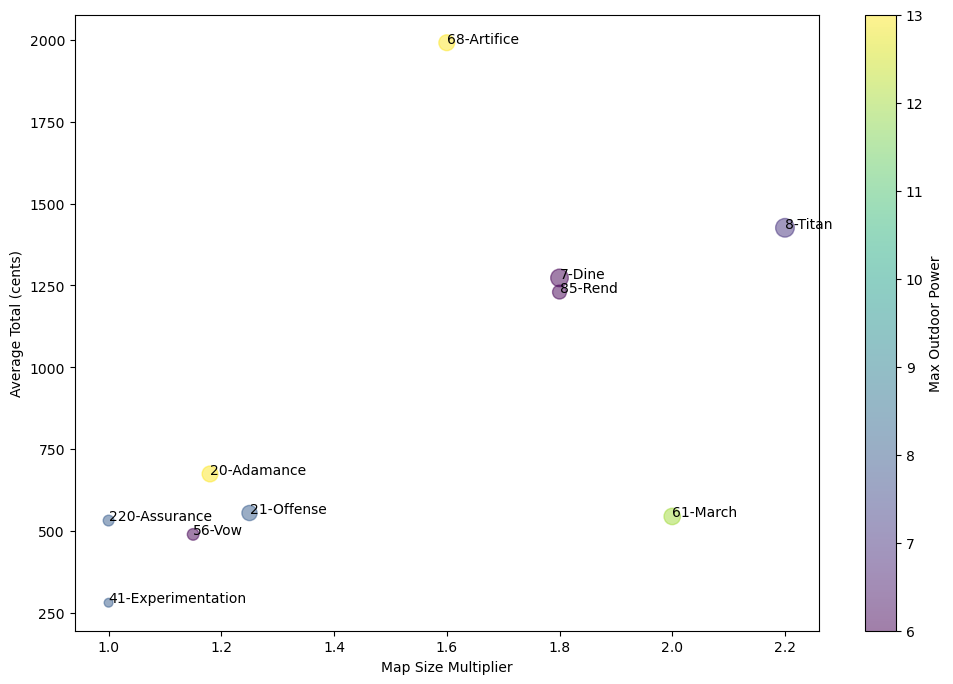

In [112]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(moons['Map Size Multiplier'], moons['Average Total (cents)'], c=moons['Max Outdoor Power'], s=moons['Max Indoor Power'] * 10, alpha=0.5, cmap='viridis')
plt.colorbar(scatter, label='Max Outdoor Power')
plt.xlabel('Map Size Multiplier')
plt.ylabel('Average Total (cents)')


for i, name in enumerate(moons['Name']):
    ax.annotate(name, (moons['Map Size Multiplier'].iloc[i], moons['Average Total (cents)'].iloc[i]))

plt.show()

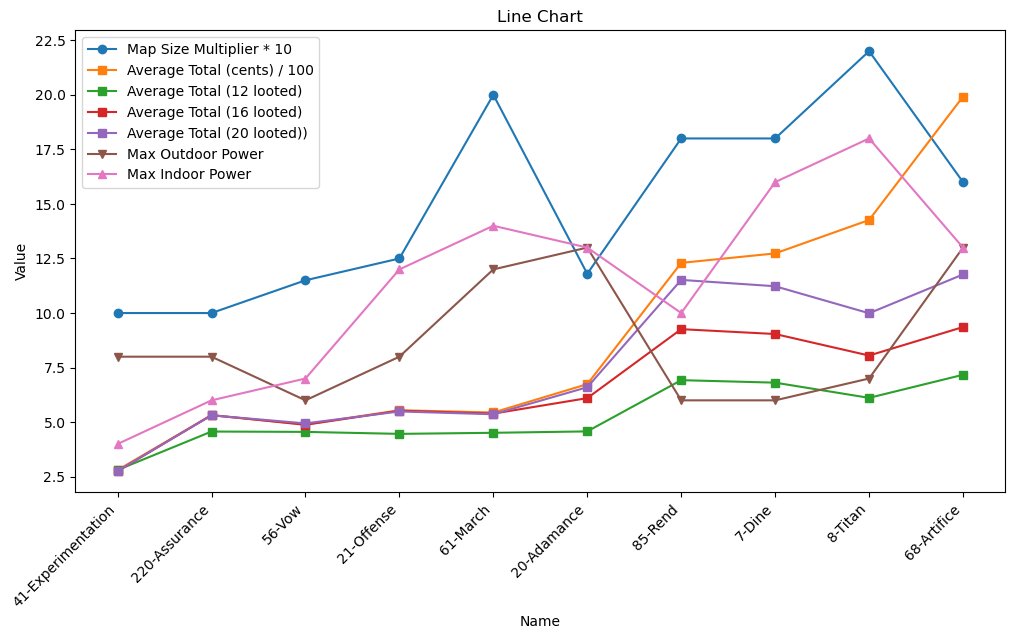

In [113]:
# Create the line chart
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(moons.index, moons['Map Size Multiplier'] * 10, marker='o', label='Map Size Multiplier * 10')


ax.plot(moons.index, moons['Average Total (cents)'] / 100, marker='s', label='Average Total (cents) / 100')
ax.plot(moons.index, moons['Average Total with 12 items looted (cents)'] / 100, marker='s', label='Average Total (12 looted)')
ax.plot(moons.index, moons['Average Total with 16 items looted (cents)'] / 100, marker='s', label='Average Total (16 looted)')
ax.plot(moons.index, moons['Average Total with 20 items looted (cents)'] / 100, marker='s', label='Average Total (20 looted))')


ax.plot(moons.index, moons['Max Outdoor Power'], marker='v', label='Max Outdoor Power')

ax.plot(moons.index, moons['Max Indoor Power'], marker='^', label='Max Indoor Power')

ax.set_xticks(np.arange(len(moons)))
ax.set_xticklabels(moons['Name'], rotation=45, ha='right')
ax.set_xlabel('Name')
ax.set_ylabel('Value')
ax.set_title('Line Chart')
ax.legend()

plt.show()

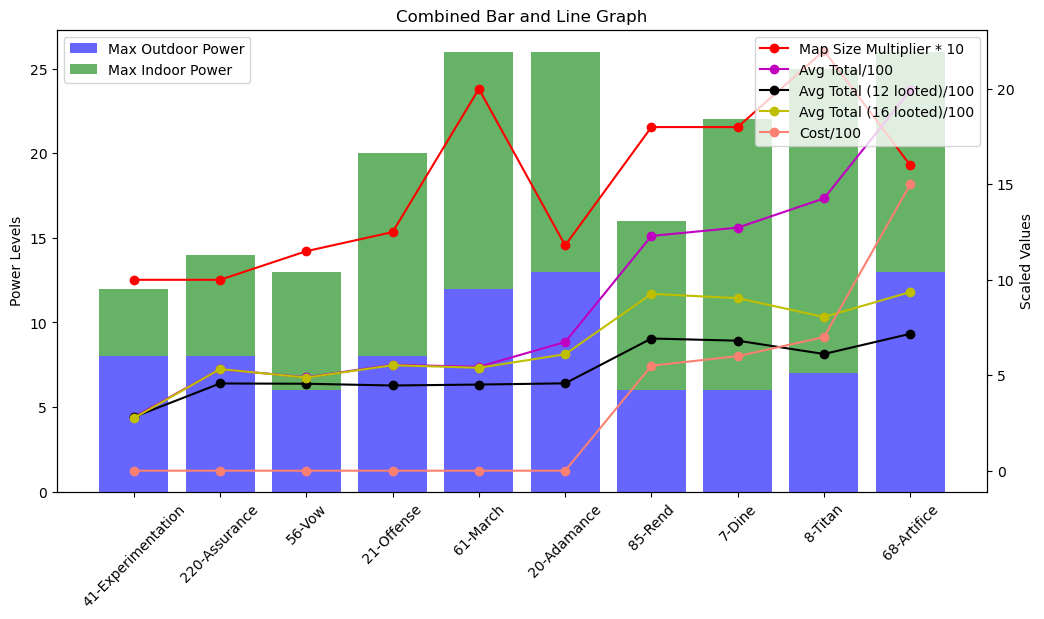

In [114]:
fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.bar(moons.index, moons['Max Outdoor Power'], color='b', alpha=0.6, label='Max Outdoor Power')
ax1.bar(moons.index, moons['Max Indoor Power'], color='g', alpha=0.6, bottom=moons['Max Outdoor Power'], label='Max Indoor Power')
ax1.set_ylabel('Power Levels')
ax1.set_xticks(np.arange(len(moons)))
ax1.set_xticklabels(moons['Name'], rotation=45)
ax1.legend(loc='upper left')

ax2 = ax1.twinx() 

colors = ['r', 'm', 'k', 'y', 'salmon']  
labels = ['Map Size Multiplier * 10', 'Avg Total/100', 'Avg Total (12 looted)/100', 'Avg Total (16 looted)/100', 'Cost/100']
scaling = [10, 0.01, 0.01, 0.01, 0.01]
columns = ['Map Size Multiplier', 'Average Total (cents)', 'Average Total with 12 items looted (cents)', 'Average Total with 16 items looted (cents)', 'Cost']

for color, label, scale, column in zip(colors, labels, scaling, columns):
    ax2.plot(moons.index, moons[column] * scale, color=color, marker='o', label=label)

ax2.set_ylabel('Scaled Values')
ax2.legend(loc='upper right')

plt.title('Combined Bar and Line Graph')
plt.show()

In [115]:
# Normalize data  (higher is better)
for column in ["Average Total (cents)", "Average Total with 12 items looted (cents)",
               "Average Total with 16 items looted (cents)", "Average Total with 20 items looted (cents)"]:
    moons[column] = (moons[column] - moons[column].min()) / (moons[column].max() - moons[column].min())

# Normalize data (lower is better)
for column in ["Map Size Multiplier", "Max Indoor Power", "Max Outdoor Power", "Cost"]:
    moons[column] = 1 - ((moons[column] - moons[column].min()) / (moons[column].max() - moons[column].min()))

moons['Score'] = (moons["Average Total (cents)"] +
               moons["Average Total with 12 items looted (cents)"] +
               moons["Average Total with 16 items looted (cents)"] +
               moons["Average Total with 20 items looted (cents)"] +
               moons["Map Size Multiplier"] +
               moons["Max Indoor Power"] +
               moons["Max Outdoor Power"] -
               moons["Cost"])

moons = moons.sort_values(by='Score', ascending=False)

print(moons[['Name', 'Score']])

                 Name     Score
9         68-Artifice  4.857143
6             85-Rend  4.727553
7              7-Dine  4.265633
8             8-Titan  3.355947
1       220-Assurance  2.794199
2              56-Vow  2.746647
3          21-Offense  2.196325
5         20-Adamance  1.775281
0  41-Experimentation  1.714286
4            61-March  0.827752
